## Do we see a wedge in our visibilities?

In [1]:
%load_ext autoreload
import sys
sys.path.append("..")
import imcurio as imc
from numpy.fft import rfft,rfftfreq
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
%autoreload
B = imc.SimBox("../sims/HImesh_0512_z100.fits")
Bf = imc.SimBox("../sims/Sky_0512_z100_060.0-30.0.fits", conversions_from = B)
T=imc.TelSim(N=128)
vis = T.get_visibilities(B)
visf = T.get_visibilities(Bf)

Box size: 20.33-15.01 deg from z=0.81-1.22
Beam sigma: 1.99-2.44 deg from z=0.81-1.22
Beam sigma at the edge: 5.12 - 3.08 
Beam sigma: 1.99-2.44 deg from z=0.81-1.22
Beam sigma at the edge: 5.12 - 3.08 


In [3]:
def getPkVis(T,vis,Nkpar=256,Nkperp=15):
    Pk = np.zeros((Nkperp,Nkpar))
    Pkw = np.zeros_like(Pk)
    uv = np.sqrt(T.u_m**2+T.v_m**2)
    duv = ((uv-uv.min())/(1.001*uv.max()-uv.min())*Nkperp).astype(int)
    for cvis,ii in zip((vis).T,duv):
        ## lets pad with zeros
        cvis = np.hstack((cvis,np.zeros_like(cvis)))
        cPk = abs(rfft(cvis)[1:]**2) ## skip dC mode
        cPkbin = cPk.reshape((-1,Nkpar)).mean(axis=0)
        Pk[ii,:] += cPkbin
        Pkw[ii,:] += 1
    Pk/=Pkw
    return Pk

In [4]:
## radial frequency binning 
dfpar=2*np.pi/(2*B.Lbox) ## we pad
## perpendicular
uv = np.sqrt(T.u_m**2+T.v_m**2)
kperlow = uv.min()*B.mtoIMpc
kperhigh = uv.max()*B.mtoIMpc

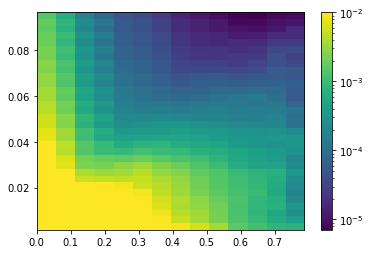

In [6]:
Pk = getPkVis(T,visf)
plt.imshow(Pk[1:,:32].T,origin='lower',norm=LogNorm(),aspect='auto',vmax=1e-2, 
           extent=(kperlow,kperhigh,0.5*dfpar,31.5*dfpar))
plt.colorbar()


Beam sigma: 1.99-2.44 deg from z=0.81-1.22
Beam sigma at the edge: 5.12 - 3.08 


[]

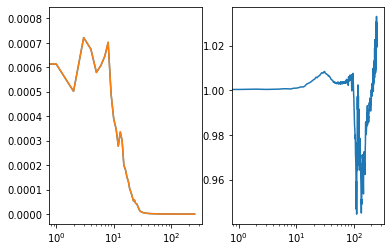

In [7]:
# does padding matter?
visfP = T.get_visibilities(Bf,pad=4)
PkP = getPkVis(T,visfP)
plt.subplot(1,2,1); plt.plot(Pk[13,:]); plt.plot(PkP[13,:]); plt.semilogx()
plt.subplot(1,2,2); plt.plot(PkP[13,:]/Pk[13,:]); plt.semilogx()

/home/anze/anaconda3/lib/python3.6/site-packages/numpy/fft/_pocketfft.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


[]

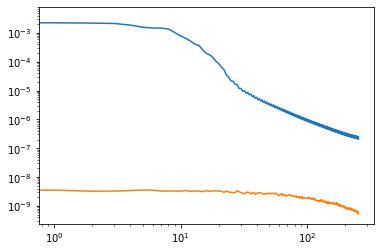

In [10]:
PkSig = getPkVis(T,vis)
plt.plot(Pk[10,:]); 
plt.plot(PkSig[10,:]);
plt.loglog()

[]

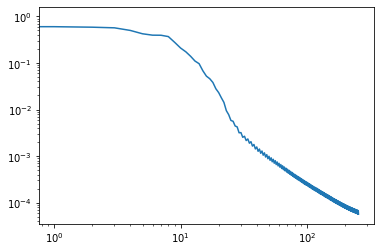

In [12]:
plt.plot(Pk[10,:]/Pk[10,0]); 
plt.loglog()